<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

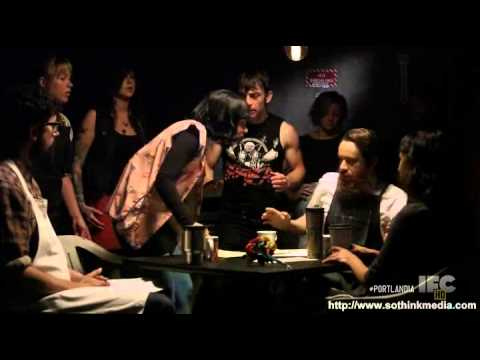

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Ashley\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops.shape

(7616, 3)

In [5]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [6]:
#splitting the date from the review column
#This will put date into a new column
dates = []
for text in shops['full_review_text']:
    dates.append(re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', text)[0])
shops['review_date'] = dates

#remove date from the full_review_text column
#remove other random text that isn't needed
shops['full_review_text'] = shops['full_review_text'].str.replace('\d', '')
shops['full_review_text'] = shops['full_review_text'].str.replace('//', '')
shops['full_review_text'] = shops['full_review_text'].str.replace('check-ins', '')
shops['full_review_text'] = shops['full_review_text'].str.replace('check-in', '')

#removing the text in star_rating
shops['star_rating'] = shops['star_rating'].map(lambda x: x.rstrip(' star rating'))

In [7]:
shops.head(20)

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corn...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclecti...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,They are located within the Northcross mal...,4.0,12/3/2016
5,The Factory - Cafe With a Soul,Very cute cafe! I think from the moment I ...,4.0,11/20/2016
6,The Factory - Cafe With a Soul,"Listed in ""Nuptial Coffee Bliss!"", Anderso...",4.0,10/27/2016
7,The Factory - Cafe With a Soul,Love this place! stars for cleanliness ...,5.0,11/2/2016
8,The Factory - Cafe With a Soul,"Ok, let's try this approach... Pros: Musi...",3.0,10/25/2016
9,The Factory - Cafe With a Soul,This place has been shown on my social med...,5.0,11/10/2016


In [8]:
#Remove the punctuation

shops['full_review_text'] = shops['full_review_text'].str.replace(r'[^\w\s]+', '')
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,Love love loved the atmosphere Every corne...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Aust...,4.0,12/2/2016
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclecti...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Ho...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,They are located within the Northcross mal...,4.0,12/3/2016


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [9]:
#time to tokenize
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [10]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [11]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,Love love loved the atmosphere Every corne...,"[love, love, loved, the, atmosphere, every, co..."
1,Listed in Date Night Austin Ambiance in Aust...,"[listed, in, date, night, austin, ambiance, in..."
2,Listed in Brunch Spots I loved the eclecti...,"[listed, in, brunch, spots, i, loved, the, ecl..."
3,Very cool decor Good drinks Nice seating Ho...,"[very, cool, decor, good, drinks, nice, seatin..."
4,They are located within the Northcross mal...,"[they, are, located, within, the, northcross, ..."
5,Very cute cafe I think from the moment I s...,"[very, cute, cafe, i, think, from, the, moment..."
6,Listed in Nuptial Coffee Bliss Anderson La...,"[listed, in, nuptial, coffee, bliss, anderson,..."
7,Love this place stars for cleanliness s...,"[love, this, place, stars, for, cleanliness, s..."
8,Ok lets try this approach Pros Music Seat...,"[ok, lets, try, this, approach, pros, music, s..."
9,This place has been shown on my social med...,"[this, place, has, been, shown, on, my, social..."


In [12]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['full_review_text'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

#not sure why letters are appearing?

[(' ', 811098),
 ('e', 409312),
 ('t', 288595),
 ('a', 267274),
 ('o', 258721),
 ('i', 205140),
 ('s', 197575),
 ('n', 194914),
 ('r', 177641),
 ('h', 152669)]

In [13]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
# Use the Function
wc = count(shops['tokens'])

In [15]:
#We'll need to use stop words to remove what is showing below
#let's do that after making some plots of what we currently have
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
55,the,6847,34809,1.0,0.045590,0.045590,0.899028
7,and,6864,26651,2.0,0.034905,0.080494,0.901261
34,a,6246,22756,3.0,0.029804,0.110298,0.820116
54,i,5532,20249,4.0,0.026520,0.136818,0.726366
37,to,5653,17164,5.0,0.022480,0.159298,0.742253


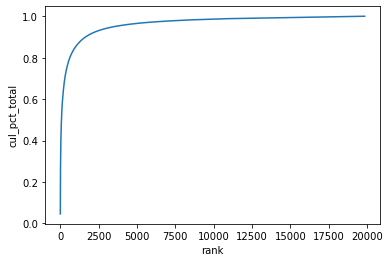

In [16]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [17]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5436753713994589

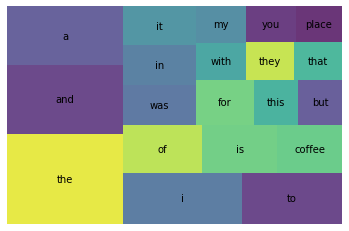

In [18]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [19]:
#Stop word time
#Spacy's Default Stop Words

nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [20]:
#Going to tokenize after default stop word removal
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [21]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [22]:
shops['tokens'].head()

0    [    , Love, love, loved, the, atmosphere, Eve...
1    [  , Listed, in, Date, Night, Austin, Ambiance...
2    [    , Listed, in, Brunch, Spots, I, loved, th...
3    [  , Very, cool, decor, Good, drinks, Nice, se...
4    [    , They, are, located, within, the, Northc...
Name: tokens, dtype: object

In [23]:
wc = count(shops['tokens'])

In [24]:
wc.head()

#maybe we need to extend the stop words?

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
57,the,6521,27891,1.0,0.035096,0.035096,0.856224
8,and,6813,25914,2.0,0.032608,0.067703,0.894564
35,a,6184,22135,3.0,0.027853,0.095556,0.811975
22,,5390,21883,4.0,0.027536,0.123092,0.707721
52,I,5488,20027,5.0,0.025200,0.148292,0.720588


In [25]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','I', 'i', 'it', "it's", 'it.', 'the', 'this',])

In [27]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['full_review_text'] = tokens

In [28]:
wc = count(shops['tokens'])
wc.head()

#I'm not sure what I'm missing here to still get the same words

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
57,the,6521,27891,1.0,0.035096,0.035096,0.856224
8,and,6813,25914,2.0,0.032608,0.067703,0.894564
35,a,6184,22135,3.0,0.027853,0.095556,0.811975
22,,5390,21883,4.0,0.027536,0.123092,0.707721
52,I,5488,20027,5.0,0.025200,0.148292,0.720588


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [24]:
#Let's look at our value counts to get a feel for the ratings

shops['star_rating'].value_counts()

 5.0    3780
 4.0    2360
 3.0     738
 2.0     460
 1.0     278
Name: star_rating, dtype: int64

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

